# Importing tools

In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# loading and seeing the description

In [8]:
cancer=load_breast_cancer()
X=cancer.data
y=cancer.target

# splitting the dataset into training and testing sets

In [9]:
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test =train_test_split(cancer.data,cancer.target, stratify=cancer.target, random_state=42)

# Logistic Regression

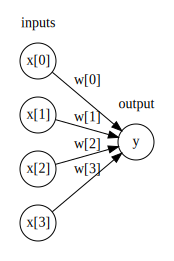

In [11]:
import mglearn
mglearn.plots.plot_logistic_regression_graph()

# Creating an instance and training data

In [12]:
logreg=LogisticRegression().fit(X_train,y_train)

### predicting the data

In [13]:
print('Accuracy of Logistic Regression  on the training dataset is :{: .3f}'.format(logreg.score(X_train,y_train)))
print('Accuracy of Logistic Regression  on the testing dataset is :{: .3f}'.format(logreg.score(X_test,y_test)))

Accuracy of Logistic Regression  on the training dataset is : 0.953
Accuracy of Logistic Regression  on the testing dataset is : 0.958


## Using Cross Validation to evaluate

In [14]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean()

In [15]:
print('Accuracy of Logistic Regression on the entire dataset is :{:.3f}'.format(scores))

Accuracy of Logistic Regression on the entire dataset is :0.951


#### Regularization:

* prevention of overfitting 
* L1 - assumes only a few features are important
* L2 - does not assume only a few features are important - used by default in scikit-learn LogisticRegression

#### 'C':

* parameter to control the strength of regularization
* lower C => log_reg adjusts to the majority of data points.
* higher C => correct classification of each data point.

## Using C=100 in Logistic regression --> Regularization

In [16]:
logreg100=LogisticRegression(C=100).fit(X_train,y_train)

In [23]:
print('Accuracy of Logistic Regression  on the training dataset is :{: .3f}'.format(logreg100.score(X_train,y_train)))
print('Accuracy of Logistic Regression  on the testing dataset is :{: .3f}'.format(logreg100.score(X_test,y_test)))

Accuracy of Logistic Regression  on the training dataset is : 0.972
Accuracy of Logistic Regression  on the testing dataset is : 0.965


## Using C=0.001 in Logistic regression --> Regularization

In [24]:
logreg001=LogisticRegression(C=0.01).fit(X_train,y_train)
print('Accuracy of Logistic Regression  on the training dataset is :{: .3f}'.format(logreg001.score(X_train,y_train)))
print('Accuracy of Logistic Regression  on the testing dataset is :{: .3f}'.format(logreg001.score(X_test,y_test)))

Accuracy of Logistic Regression  on the training dataset is : 0.934
Accuracy of Logistic Regression  on the testing dataset is : 0.930


# Using Cross Validation

In [14]:
logreg100=LogisticRegression(C=100)
scores = cross_val_score(logreg100, X, y, cv=10, scoring='accuracy').mean()
print('Accuracy of Logistic Regression on the entire dataset is :{:.3f}'.format(scores))

Accuracy of Logistic Regression on the entire dataset is :0.954


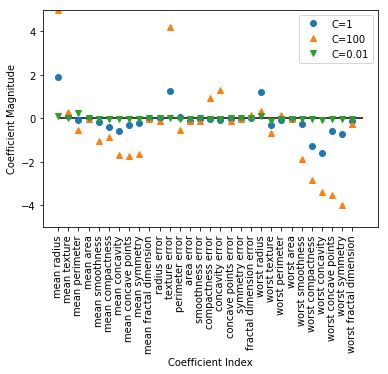

In [40]:
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg001.coef_.T, 'v', label='C=0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend()

* C => 0.01 greater regularization, tries to bring every coefficients to zero.